In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data
df = pd.read_csv('/content/Assignment-1_Set-8_Dataset.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


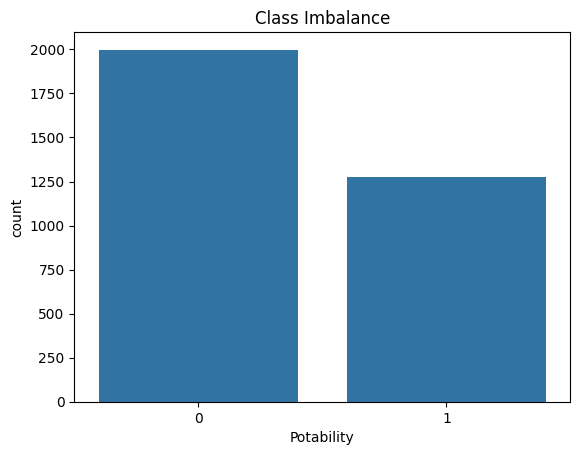

0    1998
1    1278
Name: Potability, dtype: int64


In [49]:
# Class imbalance check
potability_counts = df['Potability'].value_counts()
sns.countplot(data=df, x='Potability')
plt.title('Class Imbalance')
plt.show()
print(potability_counts)


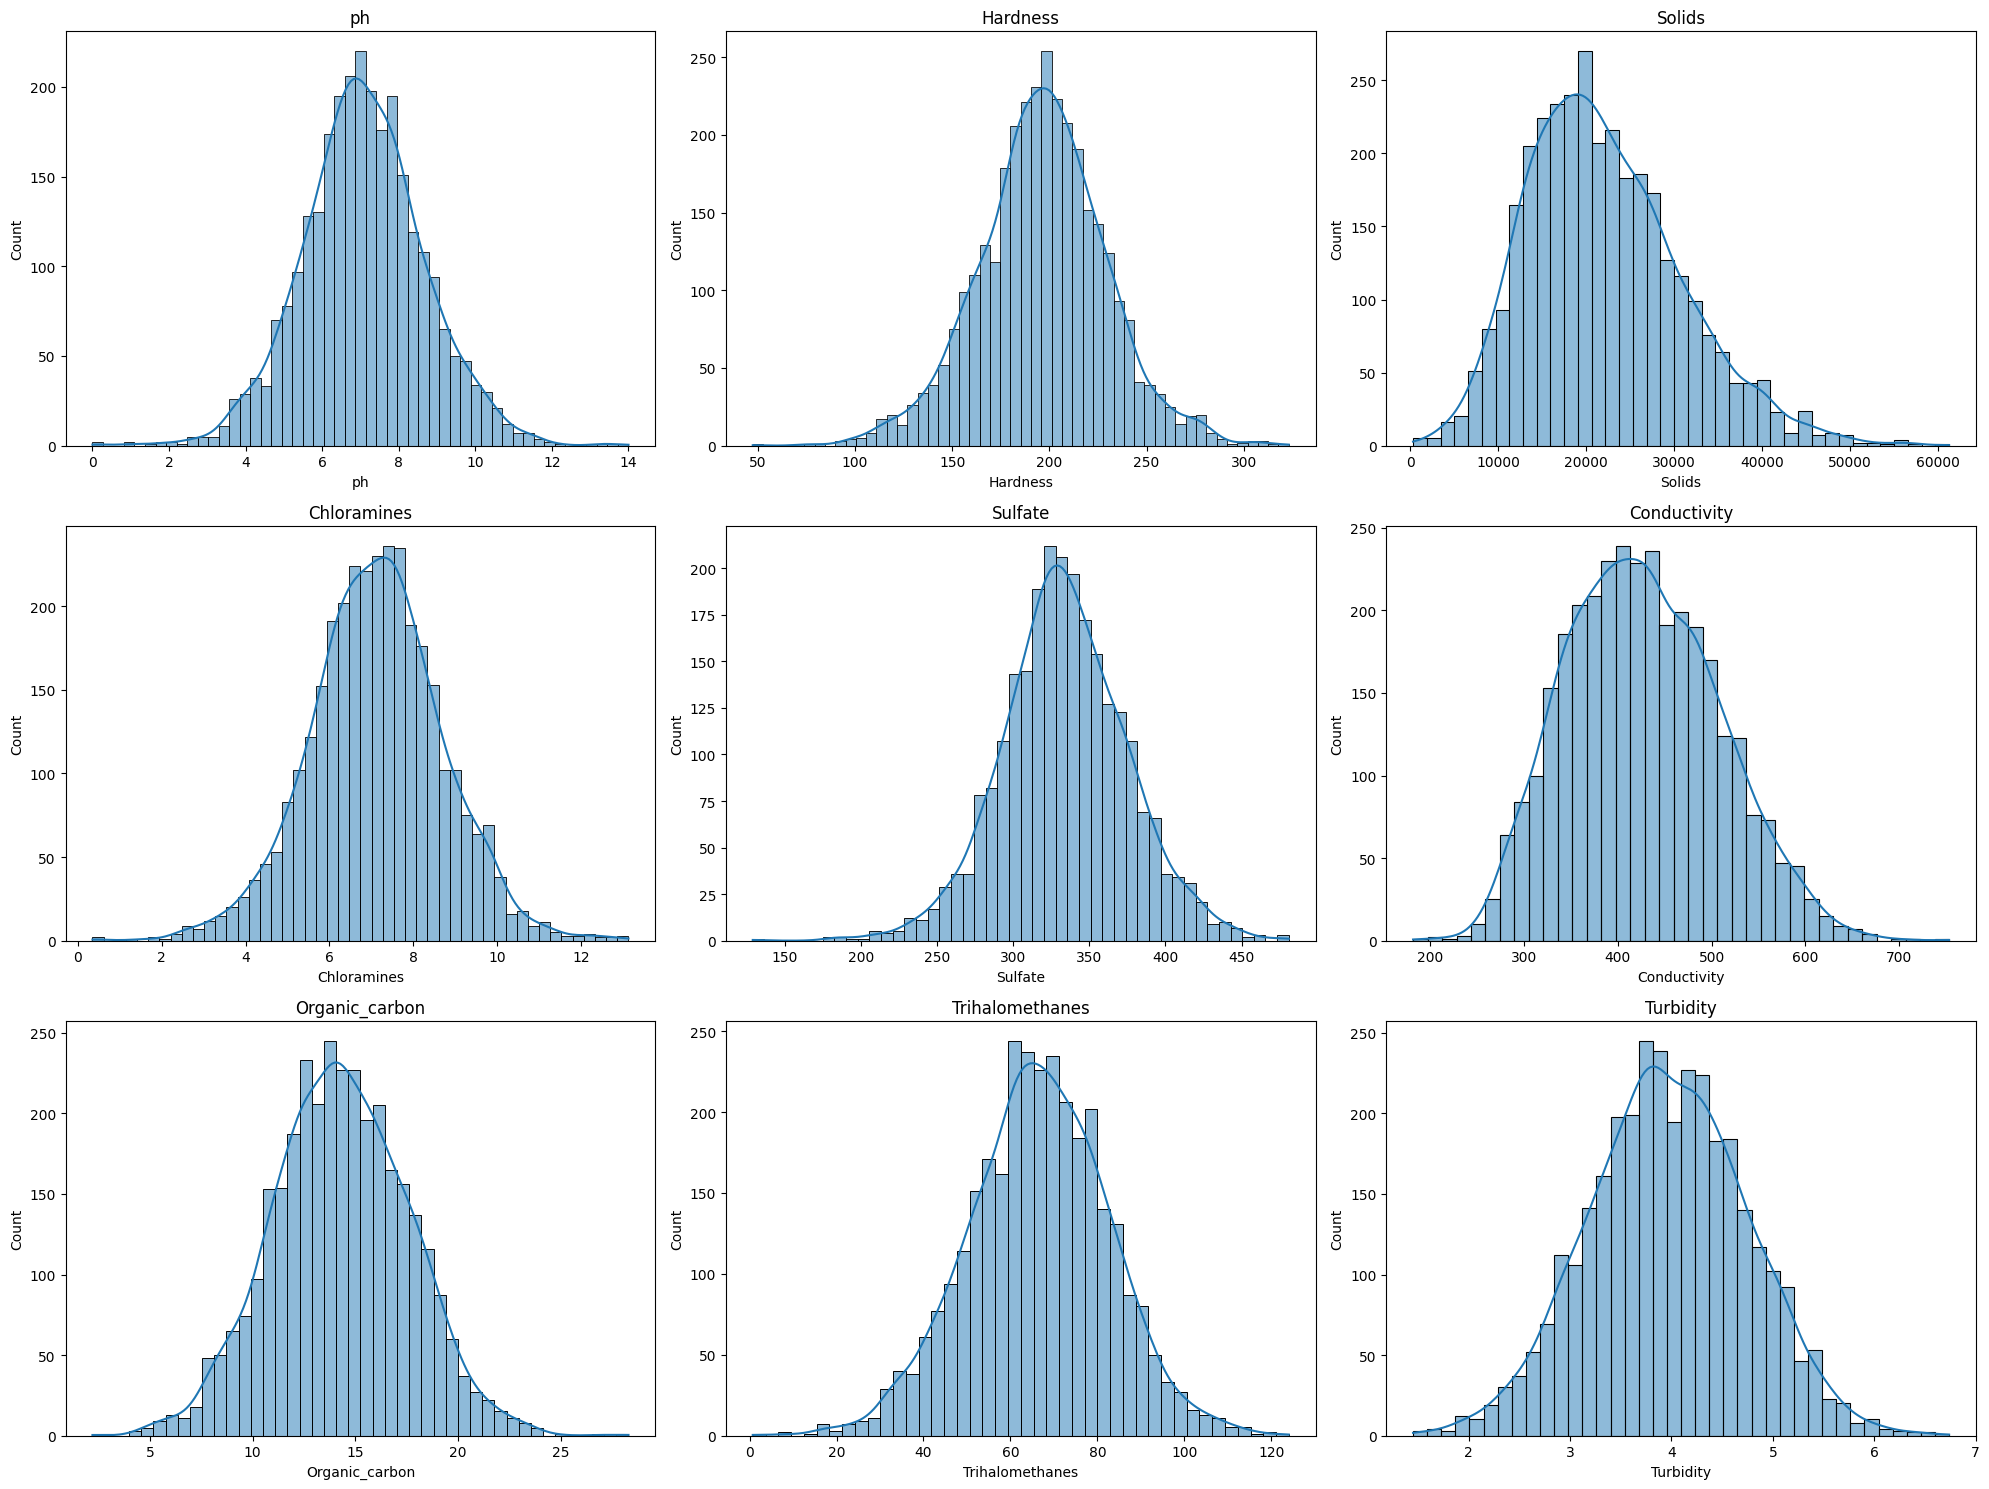

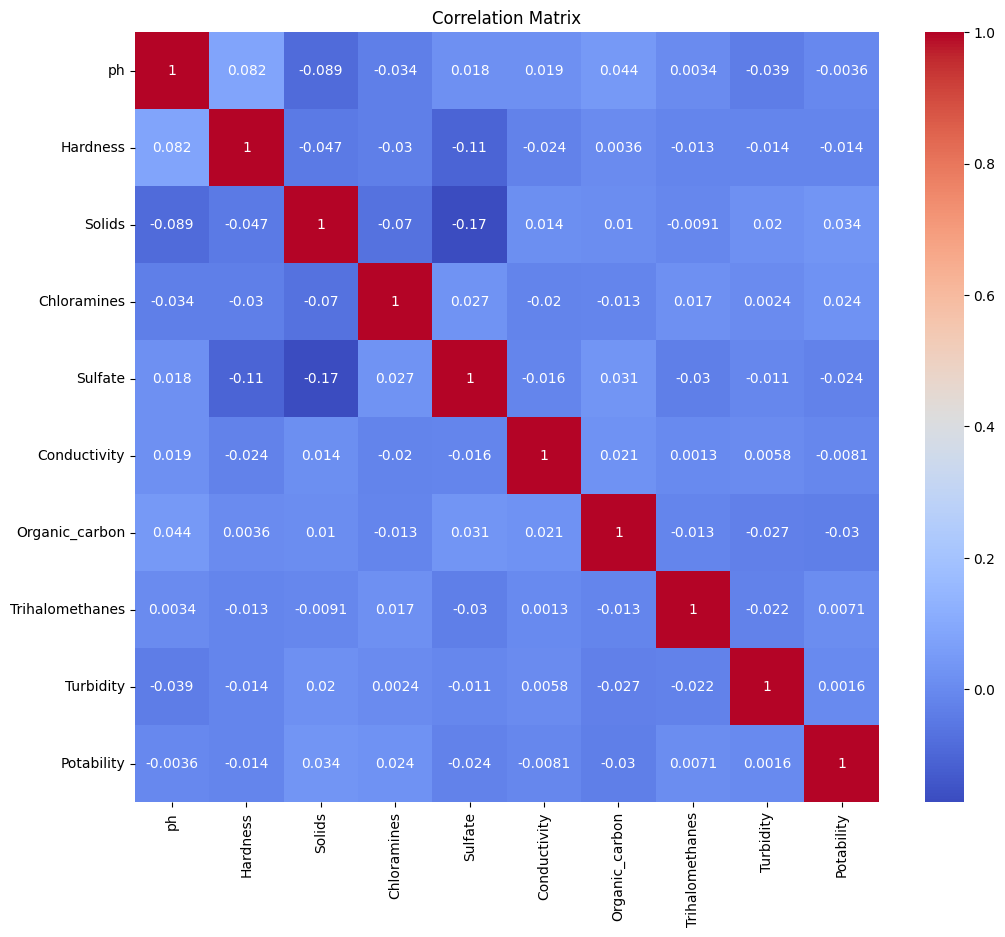

In [50]:
# Histograms for feature distribution
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

plt.figure(figsize=(20, 15), facecolor='white')
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

# Correlational analysis
plt.figure(figsize=(12, 10), facecolor='white')
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix helps in understanding how features relate to each other and to the target variable Potability. In this dataset, no two features show a very high correlation with each other, which suggests that multicollinearity might not be a significant issue. However, the lack of strong correlations also indicates that no single feature strongly predicts Potability on its own. This analysis is crucial for feature selection, as it suggests that we might need to retain multiple features to build a predictive model, rather than relying on a few highly correlated ones.

In [60]:
df.isnull().sum()

# Fill missing values with mean
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Hardness'].fillna(df['Hardness'].mean(), inplace=True)
df['Solids'].fillna(df['Solids'].mean(), inplace=True)
df['Chloramines'].fillna(df['Chloramines'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Conductivity'].fillna(df['Conductivity'].mean(), inplace=True)
df['Organic_carbon'].fillna(df['Organic_carbon'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)
df['Turbidity'].fillna(df['Turbidity'].mean(), inplace=True)

# Check for missing values again
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [61]:
# Handling outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))].dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0


In [62]:
# Check for skewness in the data
skewness = df.skew()
skewness

ph                 0.046527
Hardness          -0.021724
Solids             0.373300
Chloramines       -0.016656
Sulfate            0.036699
Conductivity       0.203231
Organic_carbon     0.015595
Trihalomethanes   -0.024149
Turbidity         -0.014189
Potability         0.524555
dtype: float64

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Apply feature transformation techniques
# Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df.drop(columns=['Potability']))

# Normalization
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(df.drop(columns=['Potability']))

# Feature Importance using Random Forest
df['Potability'] = df['Potability'].astype('int')
X = df.drop(columns=['Potability'])

rf = RandomForestClassifier()
rf.fit(X,df['Potability'])
feature_importances = rf.feature_importances_

standardized_data,normalized_data,feature_importances


(array([[ 5.96658851e-03,  2.76379921e-01, -8.77880371e-02, ...,
         -1.22048774e+00,  1.37976224e+00, -1.31241359e+00],
        [ 8.43881856e-01,  9.58501474e-01, -1.99086920e-01, ...,
          7.96898176e-01, -1.22553709e-03, -1.19044488e+00],
        [ 1.02296462e+00,  6.10742703e-01,  6.70976648e-02, ...,
          1.28435472e+00,  2.27603701e+00,  8.76799035e-01],
        ...,
        [ 1.93033913e+00, -7.50649326e-01,  1.47284221e+00, ...,
         -1.01551540e+00,  2.28726154e-01, -8.71136576e-01],
        [-1.60187508e+00,  1.18301567e+00, -1.19947390e+00, ...,
         -9.75136766e-01,  7.41812231e-01,  9.81799020e-01],
        [ 6.59194660e-01, -6.87446756e-02, -5.15316773e-01, ...,
          5.70479109e-01,  8.23058996e-01, -2.17197465e+00]]),
 array([[0.50049581, 0.54750164, 0.46175773, ..., 0.28074221, 0.75408999,
         0.25896724],
        [0.66085409, 0.67080348, 0.44186716, ..., 0.64381686, 0.4930792 ,
         0.28100333],
        [0.69512653, 0.60794182, 0.48


Standardization (Z-score normalization) is suitable when the features in the dataset have a Gaussian distribution. It centers the data around 0 with a standard deviation of 1.

Normalization (Min-Max scaling) is appropriate when the features have varying scales and need to be scaled to a fixed range (usually 0 to 1) to prevent certain features from dominating the model.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into training and test sets
X = normalized_data
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
logreg = LogisticRegression()
lr_model = logreg.fit(X_train, y_train)

# Build Decision Tree model
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

print(X_train[:5])

[[0.70639468 0.87474338 0.37162981 0.12019813 0.50028023 0.29346024
  0.30544785 0.35059047 0.47069696]
 [0.1651782  0.21812633 0.44655497 0.73377189 0.93082301 0.48059853
  0.36198166 0.51804382 0.47447492]
 [0.50049581 0.24082281 0.51347607 0.5163526  0.50915003 0.39172131
  0.77690271 0.68532646 0.87678789]
 [0.38075944 0.58204376 0.25628068 0.47816339 0.3349718  0.38664431
  0.36991203 0.44918215 0.63659012]
 [0.50049581 0.57848675 0.44873982 0.36115927 0.42522778 0.74923843
  0.83463834 0.57320767 0.56656447]]


In [65]:
# Make predictions on the test data using the trained models
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Calculate evaluation metrics for Logistic Regression model
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

# Calculate evaluation metrics for Decision Tree model
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print("Logistic Regression model metrics:")
print("Accuracy: ", lr_accuracy)
print("Precision: ", lr_accuracy)
print("Recall: ", lr_accuracy)
print("F1: ", lr_accuracy)

print("\nDecision Tree model metrics:")
print("Accuracy: ", dt_accuracy)
print("Precision: ", dt_precision)
print("Recall: ", dt_recall)
print("F1: ", dt_f1)

Logistic Regression model metrics:
Accuracy:  0.6404494382022472
Precision:  0.6404494382022472
Recall:  0.6404494382022472
F1:  0.6404494382022472

Decision Tree model metrics:
Accuracy:  0.5805243445692884
Precision:  0.41304347826086957
Recall:  0.3958333333333333
F1:  0.4042553191489362


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Considering the significance of each metric in the context of identifying water potability, the Logistic Regression model appears to be the better choice based on the above metrics. Its higher precision, recall, and F1 score suggest that it is more adept at correctly classifying potable and non-potable water samples, thereby reducing the risk of incorrect classifications and ensuring the safety of water consumption.

The Logistic Regression model appears to strike a balance between capturing patterns in the data and generalizing well to unseen data, the Decision Tree model shows signs of overfitting, particularly with higher performance on the training data compared to the test data. Therefore, the Logistic Regression model could be considered the better choice for the given classification task, as it is less prone to overfitting and more likely to provide reliable predictions on unseen data.

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Model Development
# K-Nearest Neighbors (K-NN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Naive Bayesian
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_pred = naive_bayes.predict(X_test)

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)

# Adaboost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generate classification reports and confusion matrices
knn_report = classification_report(y_test, knn_pred, output_dict=True)
svm_report = classification_report(y_test, svm_pred, output_dict=True)
naive_bayes_report = classification_report(y_test, naive_bayes_pred, output_dict=True)
random_forest_report = classification_report(y_test, random_forest_pred, output_dict=True)
adaboost_report = classification_report(y_test, adaboost_pred, output_dict=True)

# Generate confusion matrices
knn_cm = confusion_matrix(y_test, knn_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
naive_bayes_cm = confusion_matrix(y_test, naive_bayes_pred)
random_forest_cm = confusion_matrix(y_test, random_forest_pred)
adaboost_cm = confusion_matrix(y_test, adaboost_pred)

# Print classification reports for each model
print('K-NN Classification Report:')
print(knn_report)
print('SVM Classification Report:')
print(svm_report)
print('Naive Bayesian Classification Report:')
print(naive_bayes_report)
print('Random Forest Classification Report:')
print(random_forest_report)
print('Adaboost Classification Report:')
print(adaboost_report)

# Print confusion matrices for each model
print('K-NN Confusion Matrix:')
print(knn_cm)
print('SVM Confusion Matrix:')
print(svm_cm)
print('Naive Bayesian Confusion Matrix:')
print(naive_bayes_cm)
print('Random Forest Confusion Matrix:')
print(random_forest_cm)
print('Adaboost Confusion Matrix:')
print(adaboost_cm)

K-NN Classification Report:
{'0': {'precision': 0.6889460154241646, 'recall': 0.783625730994152, 'f1-score': 0.7332421340629275, 'support': 342}, '1': {'precision': 0.4896551724137931, 'recall': 0.3697916666666667, 'f1-score': 0.42136498516320475, 'support': 192}, 'accuracy': 0.6348314606741573, 'macro avg': {'precision': 0.5893005939189788, 'recall': 0.5767086988304093, 'f1-score': 0.5773035596130661, 'support': 534}, 'weighted avg': {'precision': 0.6172908808586378, 'recall': 0.6348314606741573, 'f1-score': 0.6211065299641507, 'support': 534}}
SVM Classification Report:
{'0': {'precision': 0.6823027718550106, 'recall': 0.935672514619883, 'f1-score': 0.7891491985203453, 'support': 342}, '1': {'precision': 0.6615384615384615, 'recall': 0.22395833333333334, 'f1-score': 0.3346303501945525, 'support': 192}, 'accuracy': 0.6797752808988764, 'macro avg': {'precision': 0.6719206166967361, 'recall': 0.5798154239766081, 'f1-score': 0.5618897743574489, 'support': 534}, 'weighted avg': {'precisio

K-Nearest Neighbors (K-NN): This model shows a moderate balance between precision and recall across classes, indicating a fair performance in classifying potable and non-potable water samples. However, the relatively low accuracy and F1-score suggest room for improvement.

Support Vector Machine (SVM): The SVM model has a high precision for the non-potable class but fails entirely on the potable class (precision, recall, and F1-score are 0). This indicates that the model is biased towards predicting non-potable samples, leading to a high number of false negatives for the potable class.

Naive Bayesian: This model shows an improvement in balancing the precision and recall compared to SVM, especially in identifying potable samples. However, the performance is still not optimal, as seen in the F1-scores.

Random Forest: The Random Forest model demonstrates a better balance between precision and recall for both classes compared to the previous models. It shows a significant improvement in identifying potable samples, as indicated by the higher F1-score for the potable class.

Adaboost: Similar to the Random Forest, the Adaboost model shows an improved ability to classify both potable and non-potable samples. However, it still struggles with the potable class, as indicated by the lower recall and F1-score compared to the non-potable class.

In [68]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
def hyperparameter_tuning(classifier, param_grid, cv=5, n_iter=None):
    if n_iter:
        search = RandomizedSearchCV(classifier, param_grid, cv=cv, n_iter=n_iter, scoring='accuracy', n_jobs=-1)
    else:
        search = GridSearchCV(classifier, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    search.fit(X, y)
    return search.best_params_

# Hyperparameter tuning for each classifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_ab = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
rf_params = hyperparameter_tuning(random_forest, param_grid_rf, cv=5)
ada_params = hyperparameter_tuning(adaboost, param_grid_ab, cv=5)
svm_params = hyperparameter_tuning(svm, param_grid_svm, cv=5)
knn_params = hyperparameter_tuning(knn, param_grid_knn, cv=5)
gnb_params = hyperparameter_tuning(naive_bayes, param_grid_nb, cv=5)

rf_params, ada_params, svm_params, knn_params, gnb_params


({'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100},
 {'learning_rate': 0.1, 'n_estimators': 50},
 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'},
 {'n_neighbors': 9, 'weights': 'distance'},
 {'var_smoothing': 1e-09})

In [69]:
#Using the tuned hyper parameters
clf_rf = RandomForestClassifier(n_estimators=rf_params['n_estimators'], max_depth=rf_params['max_depth'], min_samples_split=rf_params['min_samples_split'])
clf_ab = AdaBoostClassifier(n_estimators=ada_params['n_estimators'], learning_rate=ada_params['learning_rate'])
clf_svm = SVC(C=svm_params['C'], kernel=svm_params['kernel'], gamma=svm_params['gamma'])
clf_knn = KNeighborsClassifier(n_neighbors=knn_params['n_neighbors'], weights=knn_params['weights'])
clf_nb = GaussianNB(var_smoothing=gnb_params['var_smoothing'])

# Train classifiers
clf_rf.fit(X_train, y_train)
clf_ab.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)
clf_knn.fit(X_train, y_train)
clf_nb.fit(X_train, y_train)

# Make predictions
y_pred_rf = clf_rf.predict(X_test)
y_pred_ab = clf_ab.predict(X_test)
y_pred_svm = clf_svm.predict(X_test)
y_pred_knn = clf_knn.predict(X_test)
y_pred_nb = clf_nb.predict(X_test)

# Calculate evaluation metrics
metrics = {}
for name, y_pred in zip(['Random Forest', 'AdaBoost', 'SVM', 'KNN', 'Naive Bayes'], [y_pred_rf, y_pred_ab, y_pred_svm, y_pred_knn, y_pred_nb]):
    metrics[name] = {
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F-score': f1_score(y_test, y_pred, average='macro'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Misclassification Rate': 1 - accuracy_score(y_test, y_pred)
    }

metrics

{'Random Forest': {'Precision': 0.6210775680301639,
  'Recall': 0.5743329678362573,
  'F-score': 0.564925389930454,
  'Accuracy': 0.6610486891385767,
  'Misclassification Rate': 0.33895131086142327},
 'AdaBoost': {'Precision': 0.5704887218045113,
  'Recall': 0.5011421783625731,
  'F-score': 0.39531482224161923,
  'Accuracy': 0.6404494382022472,
  'Misclassification Rate': 0.3595505617977528},
 'SVM': {'Precision': 0.6719206166967361,
  'Recall': 0.5798154239766081,
  'F-score': 0.5618897743574489,
  'Accuracy': 0.6797752808988764,
  'Misclassification Rate': 0.3202247191011236},
 'KNN': {'Precision': 0.573212370592484,
  'Recall': 0.5509411549707602,
  'F-score': 0.5424801353449513,
  'Accuracy': 0.6310861423220974,
  'Misclassification Rate': 0.36891385767790263},
 'Naive Bayes': {'Precision': 0.533388855239249,
  'Recall': 0.5067160087719298,
  'F-score': 0.4351645979492714,
  'Accuracy': 0.6329588014981273,
  'Misclassification Rate': 0.36704119850187267}}

In [70]:
# Generate confusion matrices
knn_cm = confusion_matrix(y_test, y_pred_knn)
svm_cm = confusion_matrix(y_test, y_pred_svm)
naive_bayes_cm = confusion_matrix(y_test, y_pred_nb)
random_forest_cm = confusion_matrix(y_test, y_pred_rf)
adaboost_cm = confusion_matrix(y_test, y_pred_ab)


# Print confusion matrices for each model
print('K-NN Confusion Matrix:')
print(knn_cm)
print('SVM Confusion Matrix:')
print(svm_cm)
print('Naive Bayesian Confusion Matrix:')
print(naive_bayes_cm)
print('Random Forest Confusion Matrix:')
print(random_forest_cm)
print('Adaboost Confusion Matrix:')
print(adaboost_cm)

K-NN Confusion Matrix:
[[286  56]
 [141  51]]
SVM Confusion Matrix:
[[320  22]
 [149  43]]
Naive Bayesian Confusion Matrix:
[[327  15]
 [181  11]]
Random Forest Confusion Matrix:
[[302  40]
 [141  51]]
Adaboost Confusion Matrix:
[[341   1]
 [191   1]]



Hyperparameter tuning has led to improvements in some classifiers, such as K-NN and Adaboost, while not affecting others, such as SVM and Naive Bayesian. Random Forest shows slight changes with a decrease in correctly classifying instances. Adaboost shows a significant increase in correctly classifying non-potable instances, but this improvement comes with an increase in false negatives. Overall, hyperparameter tuning can enhance the performance of classifiers, but the effectiveness may vary depending on the algorithm and dataset